In [1]:
import pandas as pd
import numpy as np

import re
import ftfy
import random
import math
from tqdm.notebook import tqdm, tqdm_notebook
from collections import Counter
import string


from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-poster')
plt.style.use('seaborn-talk')

import wordninja
from spellchecker import SpellChecker
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from textblob import TextBlob


from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

from nltk.corpus import wordnet
import nltk
import emoji
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
#print(stop_words)
print('Done')

C:\Users\fosha\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\fosha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

Done


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fosha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv("df_312.csv")
df=df.drop(columns=['Unnamed: 0']) 
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,stem_token_keyword,lem_stem_token_keyword,lem_stem_token_keyword_2,lem_stem_token_keyword_combined,transport,sustain,mobil,urban,analysi
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"['accessibility', ';', 'exploratory', 'scenari...","['accessibility', ';', 'exploratory', 'scenari...","['access', ';', 'exploratori', 'scenario', ';'...","['access', ';', 'exploratori', 'scenario', ';'...","['access', 'exploratori', 'scenario', 'gi', 'p...",access; exploratori scenario; gi; pedestrian m...,[],[],['pedestrian mobil'],['urban design'],[]
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"['community', 'detection', 'algorithm', ';', '...","['community', 'detection', 'algorithm', ';', '...","['communiti', 'detect', 'algorithm', ';', 'imp...","['communiti', 'detect', 'algorithm', ';', 'imp...","['communiti', 'detect', 'algorithm', 'implemen...",communiti detect algorithm; implement pathway;...,['transport polici packag'],['sustain mobil'],['sustain mobil'],[],['structur analysi']
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"['electric', 'vehicles', ';', 'environmental',...","['electric', 'vehicle', ';', 'environmental', ...","['electr', 'vehicl', ';', 'environment', 'impa...","['electr', 'vehicl', ';', 'environment', 'impa...","['electr', 'vehicl', 'environment', 'impact', ...",electr vehicl; environment impact; life cycl c...,['public transport'],['sustain mobil'],['sustain mobil'],[],[]
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"['commercial', 'vehicles', ';', 'gentrificatio...","['commercial', 'vehicle', ';', 'gentrification...","['commerci', 'vehicl', ';', 'gentrif', ';', 'n...","['commerci', 'vehicl', ';', 'gentrif', ';', 'n...","['commerci', 'vehicl', 'gentrif', 'new', 'york...",commerci vehicl; gentrif; new york; sustain tr...,"['sustain transport', 'transport collis']",['sustain transport'],[],[],[]
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"['buses', ';', 'co2', 'emissions', ';', 'elect...","['bus', ';', 'co2', 'emission', ';', 'electric...","['buse', ';', 'co2', 'emiss', ';', 'electr', '...","['bus', ';', 'co2', 'emiss', ';', 'electr', 'v...","['bus', 'co2', 'emiss', 'electr', 'vehicl', 'm...",bus; co2 emiss; electr vehicl; multi criterion...,['sustain transport'],['sustain transport'],[],[],[]


In [3]:
###############################################################

In [4]:
##############LDA model

In [5]:
#!pip install gensim

In [6]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [7]:
#!pip install pyLDAvis

In [8]:
import gensim, spacy
import gensim.corpora as corpora

import pyLDAvis
import pyLDAvis.gensim_models


from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

nlp = spacy.load("en_core_web_sm")

print('Done')

C:\Users\fosha\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


Done


In [9]:
#add additional stopword in stopword set
newStopWords = ['gonna','wanna','would','could','also','able','always','get','getta','gotta','fyi','btwn','etc','cannot','plz',
                'pls','please','btw','woulda','coulda','ya','yet','trynna','via','canna','without','since','however','still','e','g']
stop_words.update(newStopWords)
print(stop_words)

{'as', "haven't", 'fyi', 'weren', 'about', 'during', 'me', 'on', 'trynna', "that'll", 'were', 'm', 'being', 't', 'isn', 'am', 'there', 'however', 'out', 'the', 'themselves', 'we', 'what', "you'd", 'still', 'could', 'i', 'after', 'this', 'below', 'canna', 'your', "weren't", 'how', 'shouldn', 'she', 'ours', 'only', 'through', 'or', 'here', 'where', "shan't", 'an', 'yourselves', 'both', 'e', "it's", 'hers', 'same', 'able', 'all', 'before', 'gotta', 'been', 'd', 'these', 'under', 'g', 'so', 'also', 'that', "you've", 'wanna', 'wasn', 'down', 'over', 'having', 'then', 'now', 'once', "she's", 'into', 'aren', 'was', 'does', 'those', 'against', 'between', "mightn't", 'him', 'plz', 've', 'hadn', "wouldn't", 'again', 'herself', 'he', "you'll", 'had', 'our', 'such', 'own', 'too', 'should', 'nor', 'getta', 'any', 'btw', 'will', 'cannot', 'ain', 'y', 'at', 'just', 'etc', 'because', 'doing', 'from', 'whom', 'with', 'are', 'by', 'but', 'yourself', 'who', 'doesn', 'of', 'each', 'ma', 'a', 'shan', 'than

In [10]:
#### clean abstract

#remove all copyright information. such as '© 2021 The Authors' 

def clean_copyright(content):
    s=content.astype('str') 
    s_new=[]
    for i in s:
        a=[]
#        print(i)
        for x in i:
            if ord(x) == 169: #ord('©')=169 and ord('.') ==46
#                print(x,i.index(x))
                a.append((x,i.index(x)))
#        print(a)
#        print(a[-1])
        if len(a)>0:
            f=int(i.rfind('.',0,a[0][1]))
#            print(f)
            i_new=i[:(f+1)]
        else:
            i_new=i
        s_new.append(i_new)
#    print(s_new)

    return s_new


    
def clean_abstract(content):   
    
    #lower all case
    content=content.lower()

    #transfer to ascii
    c=ftfy.fix_text(content)
    
    #remove all email, punctuation, non-ascii and all more than one space   
    #remove -\()\' and all more than one blank
    email_hyper=re.sub(r'http\S+|www\.\S+|\S+\@\S+\.com\s?|\S+\@\S+\.COM\s?|\S+\@\S+\.org\s?|\S+\@\S+\.ORG\s?|\S+\@\S+\.NET\s?|\S+\@\S+\.net\s?', ' ', c)

    clean_noascii=" ".join(re.findall(r"\w+", email_hyper)) 
    clean_content=re.sub(r'\s+', ' ', clean_noascii, flags=re.I)
     
    return clean_content
    
print('Done')

Done


In [11]:
#lemmatizing the clear word 

def pos_tag(content):    
    
    # lemmatize words (needed for calculating frequencies correctly )
    lemmatizer = WordNetLemmatizer() 
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(content)#
    print(pos_tagged_text)


#    lem_words=[lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]
#    print([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
#    return lem_words

def lemmatization(content):    
    
    # lemmatize words (needed for calculating frequencies correctly )
    lemmatizer = WordNetLemmatizer() 
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(content)#

    lem_words=[lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]
    return lem_words
    
print("Done")

Done


In [12]:
#stemming the clear word 
   
def snowball_stemming(content):

    snow_stemmer=SnowballStemmer(language='english')
    stem_lem_words = []
#    i=' '.join(re.findall(r"\w+",str(content)))
#    c=word_tokenize(i)
    stem_lem_words=[snow_stemmer.stem(x) for x in content]
    return stem_lem_words
    
print("Done")

Done


In [13]:
df['clean_copyright']=clean_copyright(df.Abstract)
df['clean_abstract']=df['clean_copyright'].apply(clean_abstract)
#df.to_csv('df_412.csv')
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,...,lem_stem_token_keyword,lem_stem_token_keyword_2,lem_stem_token_keyword_combined,transport,sustain,mobil,urban,analysi,clean_copyright,clean_abstract
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"['accessibility', ';', 'exploratory', 'scenari...","['accessibility', ';', 'exploratory', 'scenari...",...,"['access', ';', 'exploratori', 'scenario', ';'...","['access', 'exploratori', 'scenario', 'gi', 'p...",access; exploratori scenario; gi; pedestrian m...,[],[],['pedestrian mobil'],['urban design'],[],Walking accessibility planning is seen a power...,walking accessibility planning is seen a power...
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"['community', 'detection', 'algorithm', ';', '...","['community', 'detection', 'algorithm', ';', '...",...,"['communiti', 'detect', 'algorithm', ';', 'imp...","['communiti', 'detect', 'algorithm', 'implemen...",communiti detect algorithm; implement pathway;...,['transport polici packag'],['sustain mobil'],['sustain mobil'],[],['structur analysi'],Sustainability issues challenge most conventio...,sustainability issues challenge most conventio...
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"['electric', 'vehicles', ';', 'environmental',...","['electric', 'vehicle', ';', 'environmental', ...",...,"['electr', 'vehicl', ';', 'environment', 'impa...","['electr', 'vehicl', 'environment', 'impact', ...",electr vehicl; environment impact; life cycl c...,['public transport'],['sustain mobil'],['sustain mobil'],[],[],"In recent decades, urban air pollution has inc...",in recent decades urban air pollution has incr...
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"['commercial', 'vehicles', ';', 'gentrificatio...","['commercial', 'vehicle', ';', 'gentrification...",...,"['commerci', 'vehicl', ';', 'gentrif', ';', 'n...","['commerci', 'vehicl', 'gentrif', 'new', 'york...",commerci vehicl; gentrif; new york; sustain tr...,"['sustain transport', 'transport collis']",['sustain transport'],[],[],[],"New York, like many US cities has recently see...",new york like many us cities has recently seen...
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"['buses', ';', 'co2', 'emissions', ';', 'elect...","['bus', ';', 'co2', 'emission', ';', 'electric...",...,"['bus', ';', 'co2', 'emiss', ';', 'electr', 'v...","['bus', 'co2', 'emiss', 'electr', 'vehicl', 'm...",bus; co2 emiss; electr vehicl; multi criterion...,['sustain transport'],['sustain transport'],[],[],[],Electric vehicles have attracted increasing in...,electric vehicles have attracted increasing in...


In [14]:
print([pos_tag(i.split()) for i in df['clean_abstract'][:2]])

[('walking', 'VBG'), ('accessibility', 'NN'), ('planning', 'NN'), ('is', 'VBZ'), ('seen', 'VBN'), ('a', 'DT'), ('powerful', 'JJ'), ('approach', 'NN'), ('for', 'IN'), ('moving', 'VBG'), ('towards', 'NNS'), ('sustainable', 'JJ'), ('mobility', 'NN'), ('paradigms', 'NN'), ('however', 'RB'), ('little', 'JJ'), ('attention', 'NN'), ('is', 'VBZ'), ('paid', 'VBN'), ('to', 'TO'), ('determining', 'VBG'), ('which', 'WDT'), ('factors', 'NNS'), ('influence', 'VBP'), ('this', 'DT'), ('accessibility', 'NN'), ('and', 'CC'), ('why', 'WRB'), ('this', 'DT'), ('paper', 'NN'), ('addresses', 'VBZ'), ('this', 'DT'), ('gap', 'NN'), ('between', 'IN'), ('the', 'DT'), ('theory', 'NN'), ('and', 'CC'), ('the', 'DT'), ('practice', 'NN'), ('and', 'CC'), ('evaluates', 'VBZ'), ('how', 'WRB'), ('far', 'RB'), ('variations', 'NNS'), ('in', 'IN'), ('walking', 'VBG'), ('accessibility', 'NN'), ('are', 'VBP'), ('related', 'VBN'), ('to', 'TO'), ('four', 'CD'), ('specific', 'JJ'), ('walking', 'VBG'), ('needs', 'JJ'), ('attracti

In [15]:
################text preprocessing

In [16]:
#step 1 creating a 2/3gram table and counting their frequency
#step 2 remove all 2gram with freq. < 10 and 3gram with freq.<5
#step 3 calcuating PMI of 2/3gram after step2
#step 4 filtering all 2/3gram with PMI theshold
#step 5 filtering all 2gram with adj/n+n and all 3gram with n/adj+any+n/adj
#step 6 combine all 2/3gram with space
#step 7 map, lem and stem df.clean_abstract by 2/3gram after step 6
#step 8 filtering, lem and stem all remaining n 

In [17]:
#########################################################################################################################33

In [18]:
#step 1 creating a 2/3gram table and counting their frequency

In [19]:
###biggram

bigramsAM = nltk.collocations.BigramAssocMeasures()

#counting 2gram fre
bigramFinder = nltk.collocations.BigramCollocationFinder.from_documents([stem.split(' ') for stem in df['clean_abstract']])
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
bigramFreqTable


,bigram,freq
158,"(of, the)",729
122,"(in, the)",419
69,"(case, study)",304
129,"(to, the)",216
154,"(on, the)",216
...,...,...
18330,"(the, sequence)",1
18328,"(travel, conditions)",1
18327,"(largely, depends)",1
18326,"(chain, largely)",1


In [20]:
bigramFreqChart=pd.DataFrame(bigramFreqTable.freq.value_counts())
bigramFreqChart.head(20) 

##33577 of bigram appear only once, 123 of bigram words appear 10 times, so frequency more than 10 will be used in model

,freq
1,32972
2,4982
3,1948
4,899
5,575
6,388
7,231
8,187
9,130
10,121


In [21]:
###triggram

trigramsAM = nltk.collocations.TrigramAssocMeasures()

trigramFinder = nltk.collocations.TrigramCollocationFinder.from_documents([stem.split(' ') for stem in df['clean_abstract']])
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
trigramFreqTable

,trigram,freq
69,"(a, case, study)",143
529,"(in, order, to)",78
228,"(the, case, study)",61
5255,"(as, well, as)",56
1196,"(one, of, the)",54
...,...,...
25111,"(traditional, public, transport)",1
25112,"(public, transport, with)",1
25113,"(transport, with, demand)",1
25114,"(with, demand, responsive)",1


In [22]:
trigramFreqChart=pd.DataFrame(trigramFreqTable.freq.value_counts())
trigramFreqChart.head(20) 
##trigram frequency more than 5 will be used in model 

,freq
1,63875
2,3570
3,965
4,384
5,198
6,101
7,53
8,49
9,49
10,27


In [23]:
#step 2 remove all 2gram with freq. < 10 and 3gram with freq.<5

In [24]:
# remove all 2gram with freq.<=10

bigramFinder.apply_freq_filter(11)
bigram_freq_11=bigramFinder.ngram_fd.items()
bigramFreqTable_11 = pd.DataFrame(list(bigram_freq_11), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
bigramFreqTable_11

,bigram,freq
23,"(of, the)",729
15,"(in, the)",419
10,"(case, study)",304
22,"(on, the)",216
17,"(to, the)",216
...,...,...
483,"(transport, development)",11
270,"(and, transportation)",11
486,"(and, sustainability)",11
258,"(results, in)",11


In [25]:
# remove all 3gram with freq.<=5

trigramFinder.apply_freq_filter(6)
trigram_freq_6 = trigramFinder.ngram_fd.items()
trigramFreqTable_6 = pd.DataFrame(list(trigram_freq_6), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
trigramFreqTable_6

,trigram,freq
1,"(a, case, study)",143
26,"(in, order, to)",78
5,"(the, case, study)",61
181,"(as, well, as)",56
52,"(one, of, the)",54
...,...,...
224,"(objective, of, the)",6
208,"(for, sustainable, mobility)",6
199,"(associated, with, the)",6
184,"(compared, to, the)",6


In [26]:
#step 3 calcuating PMI of 2/3gram after step2

In [27]:
#2gram PMI

bigramFinder.apply_freq_filter(11)
bigramFreqTable_11_PMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigramsAM.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
print(bigramFreqTable_11_PMITable.shape)
print(bigramFreqTable_11_PMITable[(bigramFreqTable_11_PMITable.PMI<5.0)&(bigramFreqTable_11_PMITable.PMI>4.5)])
#keep 2gram with PMI >4.5

(668, 2)
                               bigram       PMI
144                  (this, research)  4.994916
145               (more, sustainable)  4.949567
146                      (propose, a)  4.944940
147            (transportation, mode)  4.938441
148                  (contribute, to)  4.907505
149                        (lead, to)  4.900841
150              (transport, systems)  4.887111
151  (transportation, infrastructure)  4.883660
152                      (impact, on)  4.880384
153                     (this, study)  4.857030
154                          (it, is)  4.855238
155                     (to, achieve)  4.837832
157                   (to, encourage)  4.833727
156                      (likely, to)  4.833727
158                     (to, improve)  4.823674
159                     (presents, a)  4.823633
160                    (to, identify)  4.820671
161                     (to, address)  4.815112
162                   (is, presented)  4.801306
163                    (to, est

In [28]:
bigramFreqTable_11_PMITable

,bigram,PMI
0,"(covid, 19)",11.911674
1,"(environmentally, friendly)",11.022511
2,"(carried, out)",10.894800
3,"(originality, value)",10.863977
4,"(greenhouse, gas)",10.800233
...,...,...
663,"(are, the)",-1.100175
664,"(be, the)",-1.109272
665,"(and, to)",-1.158757
666,"(transport, the)",-1.880647


In [29]:
#3gram PMI

trigramFinder.apply_freq_filter(6)
trigramFreqTable_6_PMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigramsAM.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)
print(trigramFreqTable_6_PMITable.shape)
print(trigramFreqTable_6_PMITable[(trigramFreqTable_6_PMITable.PMI<7.0)&(trigramFreqTable_6_PMITable.PMI>6.5)])
#keep 3gram with PMI >6.5

(408, 2)
                                trigram       PMI
276                  (to, improve, the)  6.997474
277                 (to, increase, the)  6.957946
278            (and, public, transport)  6.956444
279   (in, sustainable, transportation)  6.932867
280                   (the, effect, of)  6.913789
281                (the, promotion, of)  6.913789
282                    (study, was, to)  6.887154
283             (of, more, sustainable)  6.884779
284           (the, implementation, of)  6.884041
285                  (to, address, the)  6.881997
286                   (impact, on, the)  6.880155
287              (the, application, of)  6.871969
288                     (is, the, most)  6.858646
289         (a, sustainable, transport)  6.852905
290                  (a, framework, to)  6.845781
291               (the, importance, of)  6.843400
292               (contribute, to, the)  6.827549
293                   (the, impact, of)  6.827458
294                     (the, need, to)  

In [30]:
trigramFreqTable_6_PMITable

,trigram,PMI
0,"(coef, ci, 95)",25.887242
1,"(ci, 95, 0)",23.302280
2,"(hierarchy, process, ahp)",22.246953
3,"(p, r, system)",21.089941
4,"(greenhouse, gas, ghg)",20.405091
...,...,...
403,"(study, of, the)",2.986695
404,"(of, the, case)",2.977151
405,"(of, the, study)",2.745687
406,"(the, case, of)",2.562113


In [31]:
#step 4 filtering all 2/3gram with PMI theshold

In [32]:
bigramFreqTable_11_PMI45=bigramFreqTable_11_PMITable[(bigramFreqTable_11_PMITable.PMI>4.5)]
bigramFreqTable_11_PMI45

,bigram,PMI
0,"(covid, 19)",11.911674
1,"(environmentally, friendly)",11.022511
2,"(carried, out)",10.894800
3,"(originality, value)",10.863977
4,"(greenhouse, gas)",10.800233
...,...,...
187,"(to, determine)",4.557637
188,"(amount, of)",4.554122
189,"(transportation, planning)",4.553863
190,"(transport, modes)",4.543810


In [33]:
trigramFreqTable_6_PMI65=trigramFreqTable_6_PMITable[(trigramFreqTable_6_PMITable.PMI>6.5)]
trigramFreqTable_6_PMI65

,trigram,PMI
0,"(coef, ci, 95)",25.887242
1,"(ci, 95, 0)",23.302280
2,"(hierarchy, process, ahp)",22.246953
3,"(p, r, system)",21.089941
4,"(greenhouse, gas, ghg)",20.405091
...,...,...
303,"(to, support, the)",6.556901
304,"(development, of, sustainable)",6.530475
305,"(sustainable, development, of)",6.530475
306,"(the, role, of)",6.521471


In [34]:
#step 5 filtering all 2gram with adj/n+n and all 3gram with n/adj+any+n/adj (and /or)

In [35]:
# a function to filter 2gram with only adj/n+n structures

def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True


# a function to filter for 3gram with only n/adj+any+n/adj structures

def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[2][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

print('Done')

Done


In [36]:
# Filter 2gram with only adj/n+n structures
bigramFreqTable_11_PMI45['bigram_filter']=bigramFreqTable_11_PMI45.bigram.apply(bigram_filter)
bigramFreqTable_11_PMI45_2gflt=bigramFreqTable_11_PMI45[(bigramFreqTable_11_PMI45.bigram_filter==bool('True'))]
print(bigramFreqTable_11_PMI45_2gflt.shape)
bigramFreqTable_11_PMI45_2gflt.head()

(83, 3)


C:\Users\fosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bigram,PMI,bigram_filter
0,"(covid, 19)",11.911674,True
3,"(originality, value)",10.863977,True
4,"(greenhouse, gas)",10.800233,True
5,"(modal, shift)",10.233602,True
6,"(carbon, dioxide)",10.183561,True


In [37]:
# Filter for 3gram with only n/adj+any+n/adj structures

trigramFreqTable_6_PMI65['trigram_filter']=trigramFreqTable_6_PMI65.trigram.apply(trigram_filter)
trigramFreqTable_6_PMI65_3gflt=trigramFreqTable_6_PMI65[(trigramFreqTable_6_PMI65.trigram_filter==bool('True'))]
print(trigramFreqTable_6_PMI65_3gflt.shape)
trigramFreqTable_6_PMI65_3gflt

(41, 3)


C:\Users\fosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,trigram,PMI,trigram_filter
0,"(coef, ci, 95)",25.887242,True
1,"(ci, 95, 0)",23.302280,True
2,"(hierarchy, process, ahp)",22.246953,True
3,"(p, r, system)",21.089941,True
4,"(greenhouse, gas, ghg)",20.405091,True
5,"(second, hand, cars)",20.140293,True
6,"(carbon, dioxide, co2)",19.860770,True
8,"(greenhouse, gas, emissions)",19.119688,True
9,"(research, limitations, implications)",18.758405,True
10,"(life, cycle, assessment)",18.379741,True


In [38]:
#step 6 combine all 2/3gram with space

In [39]:
bigrams = [' '.join(x) for x in bigramFreqTable_11_PMI45_2gflt.bigram.values if x[0].isdigit() == False and x[1].isdigit() == False]
bigrams[:10]

['originality value',
 'greenhouse gas',
 'modal shift',
 'carbon dioxide',
 'recent years',
 'long term',
 'air pollution',
 'carbon footprint',
 'life cycle',
 'geographic information']

In [40]:
trigrams = [' '.join(x) for x in trigramFreqTable_6_PMI65_3gflt.trigram.values if x[0].isdigit() == False and x[1].isdigit() == False and x[2].isdigit() == False]
trigrams[:10]

['hierarchy process ahp',
 'p r system',
 'greenhouse gas ghg',
 'second hand cars',
 'carbon dioxide co2',
 'greenhouse gas emissions',
 'research limitations implications',
 'life cycle assessment',
 'renewable energy sources',
 'demand management tdm']

In [41]:
#step 7 map, lem and stem df.clean_abstract by 2/3gram after step 6

In [42]:
# Concatenate lem and stem n-grams

def replace_ngram(x):
    for trig in trigrams:
        l_trig=lemmatization(trig.split())
        sl_trig=snowball_stemming(l_trig)
        x = x.replace(trig, '_'.join(sl_trig))
    for big in bigrams:
        l_big=lemmatization(big.split())
        sl_big=snowball_stemming(l_big)        
        x = x.replace(big, '_'.join(sl_big))
    return x

print('Done')

Done


In [43]:
df['clean_abstract_rpl_ngram']=df.clean_abstract.map(lambda x: replace_ngram(x))
#df.to_csv('df_412.csv')
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,...,lem_stem_token_keyword_2,lem_stem_token_keyword_combined,transport,sustain,mobil,urban,analysi,clean_copyright,clean_abstract,clean_abstract_rpl_ngram
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"['accessibility', ';', 'exploratory', 'scenari...","['accessibility', ';', 'exploratory', 'scenari...",...,"['access', 'exploratori', 'scenario', 'gi', 'p...",access; exploratori scenario; gi; pedestrian m...,[],[],['pedestrian mobil'],['urban design'],[],Walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,walking accessibility planning is seen a power...
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"['community', 'detection', 'algorithm', ';', '...","['community', 'detection', 'algorithm', ';', '...",...,"['communiti', 'detect', 'algorithm', 'implemen...",communiti detect algorithm; implement pathway;...,['transport polici packag'],['sustain mobil'],['sustain mobil'],[],['structur analysi'],Sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,sustainability issues challenge most conventio...
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"['electric', 'vehicles', ';', 'environmental',...","['electric', 'vehicle', ';', 'environmental', ...",...,"['electr', 'vehicl', 'environment', 'impact', ...",electr vehicl; environment impact; life cycl c...,['public transport'],['sustain mobil'],['sustain mobil'],[],[],"In recent decades, urban air pollution has inc...",in recent decades urban air pollution has incr...,in recent decades urban air_pollut has increas...
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"['commercial', 'vehicles', ';', 'gentrificatio...","['commercial', 'vehicle', ';', 'gentrification...",...,"['commerci', 'vehicl', 'gentrif', 'new', 'york...",commerci vehicl; gentrif; new york; sustain tr...,"['sustain transport', 'transport collis']",['sustain transport'],[],[],[],"New York, like many US cities has recently see...",new york like many us cities has recently seen...,new york like many us cities has recently seen...
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"['buses', ';', 'co2', 'emissions', ';', 'elect...","['bus', ';', 'co2', 'emission', ';', 'electric...",...,"['bus', 'co2', 'emiss', 'electr', 'vehicl', 'm...",bus; co2 emiss; electr vehicl; multi criterion...,['sustain transport'],['sustain transport'],[],[],[],Electric vehicles have attracted increasing in...,electric vehicles have attracted increasing in...,electr_vehicl have attracted increasing intere...


In [44]:
#step 8 filtering, lem and stem all remaining n 

In [45]:
# Filter for only nouns

#def stop_word(content):
#    wordlst=[]
#    for i in content.split():
#        if i not in stop_words and len(i)>2 and not i.isdigit():
#            wordlst.append(i)
#    return wordlst

def noun_only(content):
    filtered_noun=[]
    pos_tag=nltk.pos_tag(content.split(' '))
    for word in pos_tag:
        if '_' in word[0]:
            filtered_noun.append(word[0])
#            print(word[0])
        elif word[1] in ['NN'] and len(word[0])>2 and word[0] not in stop_words:
            lemmatizer = WordNetLemmatizer() 
            lemw=lemmatizer.lemmatize(word[0],'n')
            slemw=SnowballStemmer(language='english').stem(lemw)
            filtered_noun.append(slemw)
    
    return filtered_noun

print('Done')

Done


In [46]:
# Filter all stopword, len(word)<2 and word isdigit =False
df['clean_abstract_rpl_ngram_onlyn']=df.clean_abstract_rpl_ngram.apply(noun_only)
#df.to_csv('df_412.csv')
df.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,...,lem_stem_token_keyword_combined,transport,sustain,mobil,urban,analysi,clean_copyright,clean_abstract,clean_abstract_rpl_ngram,clean_abstract_rpl_ngram_onlyn
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"['accessibility', ';', 'exploratory', 'scenari...","['accessibility', ';', 'exploratory', 'scenari...",...,access; exploratori scenario; gi; pedestrian m...,[],[],['pedestrian mobil'],['urban design'],[],Walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,"[access, plan, approach, sustain_mobil, attent..."
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"['community', 'detection', 'algorithm', ';', '...","['community', 'detection', 'algorithm', ';', '...",...,communiti detect algorithm; implement pathway;...,['transport polici packag'],['sustain mobil'],['sustain mobil'],[],['structur analysi'],Sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,"[sustain, polici, design, implement, concern, ..."
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"['electric', 'vehicles', ';', 'environmental',...","['electric', 'vehicle', ';', 'environmental', ...",...,electr vehicl; environment impact; life cycl c...,['public transport'],['sustain mobil'],['sustain mobil'],[],[],"In recent decades, urban air pollution has inc...",in recent decades urban air pollution has incr...,in recent decades urban air_pollut has increas...,"[air_pollut, citi, ecosystem, transport_sector..."
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"['commercial', 'vehicles', ';', 'gentrificatio...","['commercial', 'vehicle', ';', 'gentrification...",...,commerci vehicl; gentrif; new york; sustain tr...,"['sustain transport', 'transport collis']",['sustain transport'],[],[],[],"New York, like many US cities has recently see...",new york like many us cities has recently seen...,new york like many us cities has recently seen...,"[york, gentrif, result, rang, street, cycl, ve..."
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"['buses', ';', 'co2', 'emissions', ';', 'elect...","['bus', ';', 'co2', 'emission', ';', 'electric...",...,bus; co2 emiss; electr vehicl; multi criterion...,['sustain transport'],['sustain transport'],[],[],[],Electric vehicles have attracted increasing in...,electric vehicles have attracted increasing in...,electr_vehicl have attracted increasing intere...,"[electr_vehicl, interest, recent_year, impact,..."


In [47]:
#remove all nouns less than 10

cnt_noun = Counter()

for i in df['clean_abstract_rpl_ngram_onlyn']:

    for word in i:
        if '_' not in word:
            cnt_noun[word]+=1

print(len(cnt_noun))        
print(cnt_noun.most_common())

freqwords = set([w for (w, wc) in cnt_noun.most_common() if wc>10])

fre_word=[]
for texts in df.clean_abstract_rpl_ngram_onlyn:
    wc1=[]
    for text in texts:
        if '_' in text:
            wc1.append(text)
        elif text in freqwords:
            wc1.append(text)
    fre_word.append(wc1)    

df['clean_abstract_rpl_ngram_onlyn_mt10']=fre_word
    
#df.to_csv('df_412.csv')
df.head()

2187
[('transport', 521), ('studi', 257), ('mobil', 221), ('paper', 217), ('citi', 212), ('analysi', 207), ('model', 205), ('sustain', 199), ('system', 186), ('develop', 162), ('traffic', 153), ('research', 152), ('use', 137), ('approach', 131), ('access', 129), ('network', 121), ('transit', 119), ('plan', 115), ('road', 113), ('infrastructur', 113), ('energi', 110), ('method', 107), ('servic', 106), ('polici', 105), ('car', 104), ('level', 101), ('time', 99), ('vehicl', 96), ('cycl', 89), ('travel', 88), ('framework', 86), ('impact', 84), ('order', 84), ('process', 83), ('bicycl', 83), ('cost', 81), ('qualiti', 80), ('demand', 78), ('bus', 77), ('design', 74), ('manag', 73), ('health', 73), ('area', 72), ('implement', 69), ('number', 69), ('environ', 67), ('context', 67), ('methodolog', 66), ('effect', 63), ('applic', 62), ('articl', 56), ('reduct', 55), ('inform', 55), ('project', 54), ('govern', 53), ('busi', 53), ('tool', 51), ('popul', 51), ('integr', 51), ('effici', 50), ('simul'

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,...,transport,sustain,mobil,urban,analysi,clean_copyright,clean_abstract,clean_abstract_rpl_ngram,clean_abstract_rpl_ngram_onlyn,clean_abstract_rpl_ngram_onlyn_mt10
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"['accessibility', ';', 'exploratory', 'scenari...","['accessibility', ';', 'exploratory', 'scenari...",...,[],[],['pedestrian mobil'],['urban design'],[],Walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,"[access, plan, approach, sustain_mobil, attent...","[access, plan, approach, sustain_mobil, attent..."
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"['community', 'detection', 'algorithm', ';', '...","['community', 'detection', 'algorithm', ';', '...",...,['transport polici packag'],['sustain mobil'],['sustain mobil'],[],['structur analysi'],Sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,"[sustain, polici, design, implement, concern, ...","[sustain, polici, design, implement, concern, ..."
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"['electric', 'vehicles', ';', 'environmental',...","['electric', 'vehicle', ';', 'environmental', ...",...,['public transport'],['sustain mobil'],['sustain mobil'],[],[],"In recent decades, urban air pollution has inc...",in recent decades urban air pollution has incr...,in recent decades urban air_pollut has increas...,"[air_pollut, citi, ecosystem, transport_sector...","[air_pollut, citi, ecosystem, transport_sector..."
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"['commercial', 'vehicles', ';', 'gentrificatio...","['commercial', 'vehicle', ';', 'gentrification...",...,"['sustain transport', 'transport collis']",['sustain transport'],[],[],[],"New York, like many US cities has recently see...",new york like many us cities has recently seen...,new york like many us cities has recently seen...,"[york, gentrif, result, rang, street, cycl, ve...","[result, rang, street, cycl, vehicl, analysi, ..."
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"['buses', ';', 'co2', 'emissions', ';', 'elect...","['bus', ';', 'co2', 'emission', ';', 'electric...",...,['sustain transport'],['sustain transport'],[],[],[],Electric vehicles have attracted increasing in...,electric vehicles have attracted increasing in...,electr_vehicl have attracted increasing intere...,"[electr_vehicl, interest, recent_year, impact,...","[electr_vehicl, interest, recent_year, impact,..."


In [48]:
###############################LDA model

In [49]:
# Create Dictionary

id2word = corpora.Dictionary(df.clean_abstract_rpl_ngram_onlyn_mt10)
# Print dictionary
print(id2word.token2id)

## Create Term document frequency (corpus)
# Term Document Frequency
corpus = [id2word.doc2bow(word) for word in df.clean_abstract_rpl_ngram_onlyn_mt10]
# Print corpus for first document
print(corpus[0])



{'access': 0, 'approach': 1, 'attent': 2, 'attract': 3, 'case_studi': 4, 'comfort': 5, 'densiti': 6, 'design': 7, 'district': 8, 'factor': 9, 'gap': 10, 'need': 11, 'paper': 12, 'pattern': 13, 'plan': 14, 'practic': 15, 'safeti': 16, 'sustain_mobil': 17, 'theori': 18, 'use': 19, 'walk': 20, 'applic': 21, 'concern': 22, 'develop': 23, 'exampl': 24, 'govern': 25, 'implement': 26, 'itali': 27, 'organ': 28, 'part': 29, 'polici': 30, 'question': 31, 'region': 32, 'sustain': 33, 'tool': 34, 'transport': 35, 'air_pollut': 36, 'analysi': 37, 'assess': 38, 'batteri': 39, 'citi': 40, 'cost': 41, 'ecosystem': 42, 'electr_vehicl_ev': 43, 'ev': 44, 'ghg_emiss': 45, 'greenhous_gas_ghg_emiss': 46, 'impact': 47, 'influenc': 48, 'introduct': 49, 'life_cycl': 50, 'mainten': 51, 'methodolog': 52, 'order': 53, 'reduct': 54, 'renew_energi_sourc': 55, 'research': 56, 'sensit': 57, 'studi': 58, 'taxi': 59, 'transport_sector': 60, 'control': 61, 'cycl': 62, 'effect': 63, 'environ': 64, 'frequenc': 65, 'land_u

In [50]:
#### the first line word and fre
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:1]]

[[('access', 8),
  ('approach', 1),
  ('attent', 1),
  ('attract', 1),
  ('case_studi', 1),
  ('comfort', 2),
  ('densiti', 1),
  ('design', 3),
  ('district', 1),
  ('factor', 1),
  ('gap', 1),
  ('need', 1),
  ('paper', 2),
  ('pattern', 1),
  ('plan', 1),
  ('practic', 1),
  ('safeti', 1),
  ('sustain_mobil', 1),
  ('theori', 1),
  ('use', 1),
  ('walk', 1)]]

In [94]:
#ldamodel2 = Lda(corpus=corpus, num_topics=k, id2word=id2word, passes=600, iterations=1500, chunksize = 50, eval_every = None,random_state=0,alpha=0.01,eta=0.9)
#ldamodel3 = Lda(corpus=corpus, num_topics=k, id2word=id2word, passes=600, iterations=1500, chunksize = 50, eval_every = None,random_state=0,alpha=0.01,eta=0.95)

coherence_2 = []
for k in range(2,16):
    Lda = LdaModel
    ldamodel3 = Lda(corpus=corpus, num_topics=k, id2word=id2word, passes=600, iterations=1500, chunksize = 50, eval_every = None,random_state=0,alpha=0.01,eta=0.95)
    cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel3, texts=df.clean_abstract_rpl_ngram_onlyn_mt10, dictionary=id2word, coherence='c_v')
    coherence_2.append((k,cm.get_coherence()))
    print('Round: '+str(k))



Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15


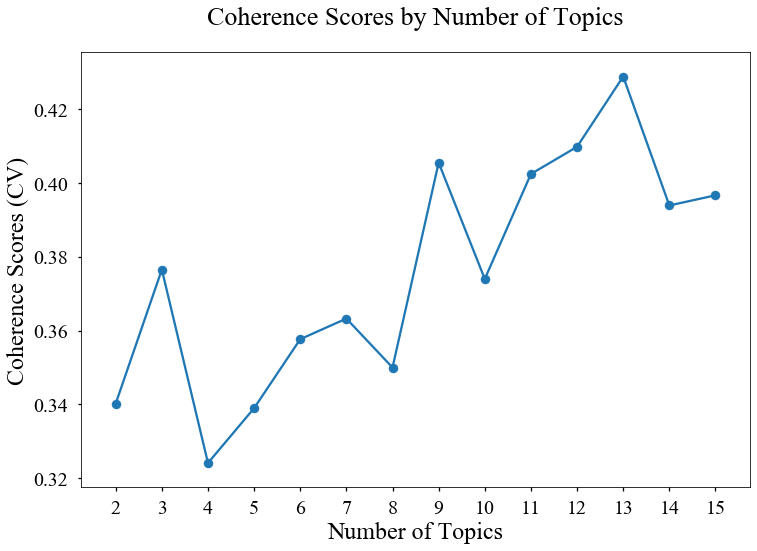

The 13 topics gives the highest coherence score of 0.42893375612532114
The 3 topics gives the coherence score of 0.376548659695695
The 9 topics gives the coherence score of 0.4055568307099191


In [95]:
x_val_2 = [x[0] for x in coherence_2]
y_val_2 = [x[1] for x in coherence_2]

plt.figure(figsize=(12,8))

plt.plot(x_val_2,y_val_2)
plt.scatter(x_val_2,y_val_2)
plt.title('Coherence Scores by Number of Topics',fontsize=26,y=1.05)
plt.xlabel('Number of Topics', fontsize = 24)
plt.ylabel('Coherence Scores (CV)', fontsize = 24)
plt.xticks(x_val_2)
plt.tick_params(axis='both',labelsize=20)

plt.show()

print(f'''The {x_val_2[y_val_2.index(max(y_val_2))]} topics gives the highest coherence score of {max(y_val_2)}''')
print(f'''The {x_val_2[1]} topics gives the coherence score of {y_val_2[1]}''')
print(f'''The {x_val_2[7]} topics gives the coherence score of {y_val_2[7]}''')

In [96]:
ldamodel3_3 = Lda(corpus=corpus, num_topics=3, id2word=id2word, passes=600, iterations=1500, chunksize = 50, eval_every = None,random_state=0,alpha=0.01,eta=0.95)
    
pyLDAvis.enable_notebook()
topic_ldamodel3_3 =  pyLDAvis.gensim_models.prepare(ldamodel3_3, corpus, id2word, mds = 'pcoa',sort_topics=False)
pyLDAvis.display(topic_ldamodel3_3)

C:\Users\fosha\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [97]:
ldamodel3_9 = Lda(corpus=corpus, num_topics=9, id2word=id2word, passes=600, iterations=1500, chunksize = 50, eval_every = None,random_state=0,alpha=0.01,eta=0.95)
    
pyLDAvis.enable_notebook()
topic_ldamodel3_9 =  pyLDAvis.gensim_models.prepare(ldamodel3_9, corpus, id2word, mds = 'pcoa',sort_topics=False)
pyLDAvis.display(topic_ldamodel3_9)

In [98]:
ldamodel3_12 = Lda(corpus=corpus, num_topics=12, id2word=id2word, passes=600, iterations=1500, chunksize = 50, eval_every = None,random_state=0,alpha=0.01,eta=0.95)
    
pyLDAvis.enable_notebook()
topic_ldamodel3_12 =  pyLDAvis.gensim_models.prepare(ldamodel3_12, corpus, id2word, mds = 'pcoa',sort_topics=False)
pyLDAvis.display(topic_ldamodel3_12)

In [55]:
#pyLDAvis.save_html(topic_data_3, 'review_topic_data_lda_3.html')

In [99]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0.6 # Adjust this accordingly based on tuning above
for i in range(1,4): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_ldamodel3_3.topic_info[topic_ldamodel3_3.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values
    

#Topics and top 10 key words

pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9
Topic 1,energi,car_share,vehicl,cost,batteri,servic,system,electr_vehicl,reduct,fuel
Topic 2,health,mobil,bicycl,cycl,car,share,transit,walk,studi,transport
Topic 3,transport,sustain,paper,develop,case_studi,model,sustain_transport,traffic,citi,studi


In [57]:
###outout save

In [101]:
topic_name={0: 'T1: energi reduct & electr_vehicl', 
            1: 'T2: health & mobil',
            2: 'T3: sustain transport develop'}

topic_list=['T1: energi reduct & electr_vehicl', 
           'T2: health & mobil',
           'T3: sustain transport develop']

In [102]:
#save topic output in df

all_topics_df = ldamodel3_3.get_document_topics(corpus, minimum_probability=0.0)
#print(all_topics_df)
all_topics_csr = gensim.matutils.corpus2csc(all_topics_df)
#print(all_topics_csr)
all_topics_numpy = all_topics_csr.T.toarray()
df_new = pd.concat([df, pd.DataFrame(all_topics_numpy)], axis=1)
df_new_1=df_new.rename(topic_name,axis=1)
df_new_1['topic']=df_new_1[topic_list].idxmax(axis=1)
df_new_1.to_csv('df_new_1.csv')
df_new_1.head()

,Title,Year,Source title,Cited by,Link,Abstract,Author Keywords,Publisher,token_keyword,lem_token_keyword,...,analysi,clean_copyright,clean_abstract,clean_abstract_rpl_ngram,clean_abstract_rpl_ngram_onlyn,clean_abstract_rpl_ngram_onlyn_mt10,T1: energi reduct & electr_vehicl,T2: health & mobil,T3: sustain transport develop,topic
0,Evaluating the impact of urban design scenario...,2021,Sustainable Cities and Society,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Walking accessibility planning is seen a power...,Accessibility; Exploratory scenarios; GIS; Ped...,Elsevier Ltd,"['accessibility', ';', 'exploratory', 'scenari...","['accessibility', ';', 'exploratory', 'scenari...",...,[],Walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,walking accessibility planning is seen a power...,"[access, plan, approach, sustain_mobil, attent...","[access, plan, approach, sustain_mobil, attent...",0.000312,0.249590,0.750098,T3: sustain transport develop
1,Thinking together and governance in transport ...,2021,International Journal of E-Planning Research,0.0,https://www.scopus.com/inward/record.uri?eid=2...,Sustainability issues challenge most conventio...,Community Detection Algorithm; Implementation ...,IGI Global,"['community', 'detection', 'algorithm', ';', '...","['community', 'detection', 'algorithm', ';', '...",...,['structur analysi'],Sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,sustainability issues challenge most conventio...,"[sustain, polici, design, implement, concern, ...","[sustain, polici, design, implement, concern, ...",0.000370,0.000370,0.999260,T3: sustain transport develop
2,Technoeconomic analysis and environmental impa...,2021,World Electric Vehicle Journal,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"In recent decades, urban air pollution has inc...",Electric vehicles; Environmental impact; Life-...,MDPI AG,"['electric', 'vehicles', ';', 'environmental',...","['electric', 'vehicle', ';', 'environmental', ...",...,[],"In recent decades, urban air pollution has inc...",in recent decades urban air pollution has incr...,in recent decades urban air_pollut has increas...,"[air_pollut, citi, ecosystem, transport_sector...","[air_pollut, citi, ecosystem, transport_sector...",0.999488,0.000256,0.000256,T1: energi reduct & electr_vehicl
3,Multi-modal interactions on urban streets: New...,2021,Applied Geography,0.0,https://www.scopus.com/inward/record.uri?eid=2...,"New York, like many US cities has recently see...",Commercial vehicles; Gentrification; New York;...,Elsevier Ltd,"['commercial', 'vehicles', ';', 'gentrificatio...","['commercial', 'vehicle', ';', 'gentrification...",...,[],"New York, like many US cities has recently see...",new york like many us cities has recently seen...,new york like many us cities has recently seen...,"[york, gentrif, result, rang, street, cycl, ve...","[result, rang, street, cycl, vehicl, analysi, ...",0.000416,0.343163,0.656421,T3: sustain transport develop
4,Route prioritization of urban public transport...,2021,Renewable and Sustainable Energy Reviews,1.0,https://www.scopus.com/inward/record.uri?eid=2...,Electric vehicles have attracted increasing in...,Buses; CO2 emissions; Electric vehicle; Multi-...,Elsevier Ltd,"['buses', ';', 'co2', 'emissions', ';', 'elect...","['bus', ';', 'co2', 'emission', ';', 'electric...",...,[],Electric vehicles have attracted increasing in...,electric vehicles have attracted increasing in...,electr_vehicl have attracted increasing intere...,"[electr_vehicl, interest, recent_year, impact,...","[electr_vehicl, interest, recent_year, impact,...",0.624435,0.000232,0.375332,T1: energi reduct & electr_vehicl


In [103]:
topic=pd.DataFrame(df_new_1.groupby(['Year','topic'])['Title'].count().unstack().fillna(0))

#percentage of topics by year
topic_pcts=round(topic.div(topic.sum(axis=1), axis=0)*100,1)
topic_pcts.to_csv("Figure 16 Percentage of Topics by Year.csv")
topic_pcts

topic,T1: energi reduct & electr_vehicl,T2: health & mobil,T3: sustain transport develop
Year,,,
2015,16.1,25.8,58.1
2016,12.0,16.0,72.0
2017,17.1,26.8,56.1
2018,12.5,17.5,70.0
2019,22.2,24.1,53.7
2020,16.7,26.0,57.3
2021,26.8,19.7,53.5


<Figure size 1152x720 with 0 Axes>

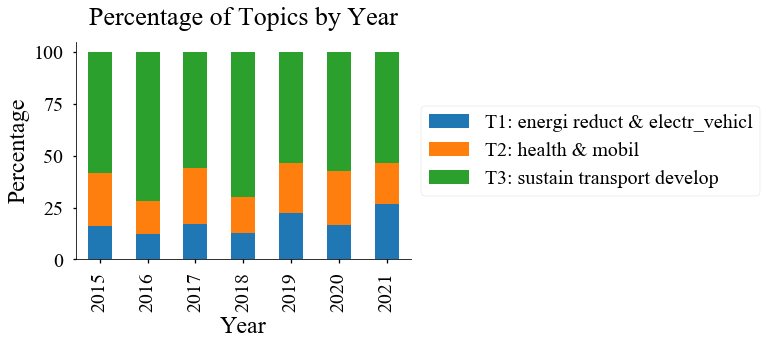

In [106]:
plt.figure(figsize=(16,10))

topic_pct_year=topic_pcts.plot(kind='bar', stacked=True)

topic_pct_year.set_xlabel("Year", fontsize = 24)
topic_pct_year.set_ylabel("Percentage", fontsize = 24)
topic_pct_year.set_title("Percentage of Topics by Year", fontsize = 26,y=1.05)
topic_pct_year.tick_params(axis='both',labelsize=20)
topic_pct_year.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 20)

sns.despine()
plt.show()



In [108]:
df_top=df_new_1.groupby(df_new_1['topic']).agg(
                        number_of_publication=pd.NamedAgg(column='Title',aggfunc='count'),
                        total_citation=pd.NamedAgg(column='Cited by',aggfunc=sum),
                        mean_citation=pd.NamedAgg(column='Cited by',aggfunc='mean'),

                                   )
df_top.to_csv("Figure 15 Percentage of Topics.csv")
df_top

,number_of_publication,total_citation,mean_citation
topic,,,
T1: energi reduct & electr_vehicl,67,599.0,8.940299
T2: health & mobil,82,672.0,8.195122
T3: sustain transport develop,209,1974.0,9.444976


<Figure size 1152x720 with 0 Axes>

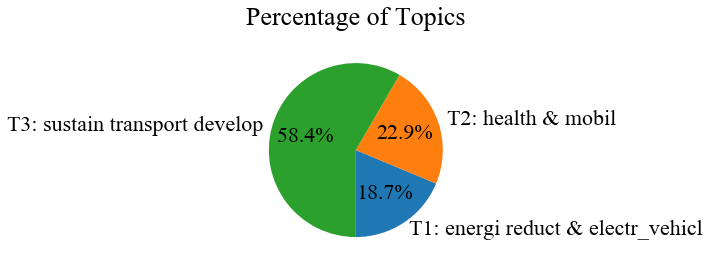

In [105]:
plt.figure(figsize=(16,10))

topic_pie=df_top.plot.pie(y='number_of_publication',autopct='%1.1f%%', startangle=270, fontsize=22)

#topic_pie.set_xlabel("Year", fontsize = 24)
topic_pie.set_ylabel(" ", fontsize = 24)
topic_pie.set_title("Percentage of Topics", fontsize = 26,y=1.05)
#topic_pie.tick_params(axis='both',labelsize=20)
topic_pie.get_legend().remove()

sns.despine()
plt.show()


<Figure size 1152x720 with 0 Axes>

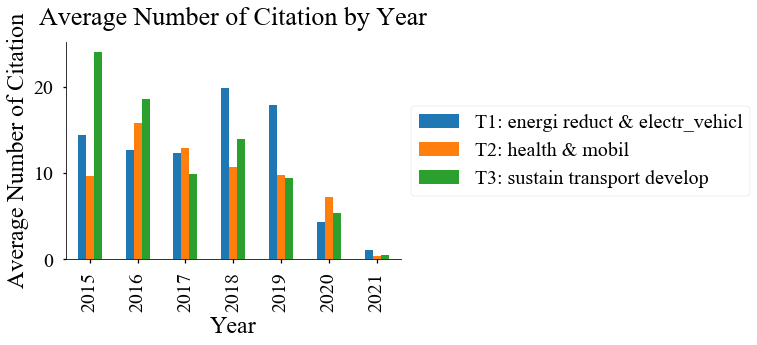

In [122]:
topic_mean=pd.DataFrame(df_new_1.groupby(['Year','topic'])['Cited by'].mean().unstack().fillna(0))
topic_mean.to_csv('Figure 17 Average Number of Citation by Topics and Year.csv')

plt.figure(figsize=(16,10))

topic_mean_plt=topic_mean.plot(kind="bar")

topic_mean_plt.set_xlabel("Year", fontsize = 24)
topic_mean_plt.set_ylabel("Average Number of Citation", fontsize = 24)
topic_mean_plt.set_title("Average Number of Citation by Year", fontsize = 26,y=1.05)
topic_mean_plt.tick_params(axis='both',labelsize=20)
topic_mean_plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 20,shadow=False)

sns.despine()
plt.show()

In [64]:
print(df_new_1.Abstract[41])

Sustainable mobility issues in rural areas, compared with urban mobility issues, have so far been poorly covered in the French and European public debate. However, local mobility issues are determining factors in territorial inequalities, regional development and ecological transition. This paper is based on preliminary findings of qualitative socio-anthropological fieldwork carried out in two rural departments of the Auvergne-Rhône-Alpes region: Drôme and Ardèche. Our objective is to highlight how the question of sustainable local mobility is linked to governance issues and multiple overlapping institutions. We argue that analyzing stakeholders’ strategies and territorial governance is key to understanding the contemporary dynamics surrounding a transition towards a more sustainable mobility in rural areas. In order to do so, we show how the debates surrounding the adoption of a law allowing for the transfer of responsibility to local authorities for the organization of mobility servi

In [65]:
print(df_new_1.clean_abstract[41])

sustainable mobility issues in rural areas compared with urban mobility issues have so far been poorly covered in the french and european public debate however local mobility issues are determining factors in territorial inequalities regional development and ecological transition this paper is based on preliminary findings of qualitative socio anthropological fieldwork carried out in two rural departments of the auvergne rhône alpes region drôme and ardèche our objective is to highlight how the question of sustainable local mobility is linked to governance issues and multiple overlapping institutions we argue that analyzing stakeholders strategies and territorial governance is key to understanding the contemporary dynamics surrounding a transition towards a more sustainable mobility in rural areas in order to do so we show how the debates surrounding the adoption of a law allowing for the transfer of responsibility to local authorities for the organization of mobility services reveals 

In [66]:
print(df_new_1.clean_abstract_rpl_ngram[41])

sustain_mobil issues in rural_area compared with urban mobility issues have so far been poorly covered in the french and european public debate however local mobility issues are determining factors in territorial inequalities regional development and ecological transition this paper is based on preliminary findings of qualitative socio anthropological fieldwork carried out in two rural departments of the auvergne rhône alpes region drôme and ardèche our objective is to highlight how the question of sustainable local mobility is linked to governance issues and multiple overlapping institutions we argue that analyzing stakeholders strategies and territorial governance is key to understanding the contemporary dynamics surrounding a transition towards a more sustain_mobil in rural_area in order to do so we show how the debates surrounding the adoption of a law allowing for the transfer of responsibility to local authorities for the organization of mobility services reveals the complexity o

In [67]:
print(df_new_1.clean_abstract_rpl_ngram_onlyn[41])

['sustain_mobil', 'rural_area', 'mobil', 'debat', 'mobil', 'develop', 'transit', 'paper', 'fieldwork', 'auvergn', 'rhône', 'region', 'drôme', 'object', 'question', 'mobil', 'govern', 'transit', 'sustain_mobil', 'rural_area', 'order', 'adopt', 'law', 'transfer', 'respons', 'organ', 'mobil', 'complex', 'mobil', 'govern', 'rural_area', 'materi', 'analysi', 'stakehold', 'engag', 'cooper', 'conflict', 'field', 'sustain_mobil', 'case_studi', 'organ', 'public_transport', 'servic', 'area', 'light', 'action']


In [68]:
print(df_new_1.clean_abstract_rpl_ngram_onlyn_mt10[41])

['sustain_mobil', 'rural_area', 'mobil', 'mobil', 'develop', 'transit', 'paper', 'region', 'object', 'question', 'mobil', 'govern', 'transit', 'sustain_mobil', 'rural_area', 'order', 'adopt', 'respons', 'organ', 'mobil', 'complex', 'mobil', 'govern', 'rural_area', 'analysi', 'field', 'sustain_mobil', 'case_studi', 'organ', 'public_transport', 'servic', 'area']


In [69]:
print(df_new_1.iloc[41])

Title                                  Sustainable mobility and the institutional loc...
Year                                                                                2021
Source title                                                Sustainability (Switzerland)
Cited by                                                                             0.0
Link                                   https://www.scopus.com/inward/record.uri?eid=2...
Abstract                               Sustainable mobility issues in rural areas, co...
Author Keywords                        Bus; Decentralization; France; LOM; Mobility j...
Publisher                                                                        MDPI AG
token_keyword                          ['bus', ';', 'decentralization', ';', 'france'...
lem_token_keyword                      ['bus', ';', 'decentralization', ';', 'france'...
stem_token_keyword                     ['bus', ';', 'decentr', ';', 'franc', ';', 'lo...
lem_stem_token_keywor